# WORD CLOUD AND SENTIMENT ANALYSIS

## INSTALL LIBRARIES IF NOT INSTALLED

In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
pip install pillow

In [ ]:
pip install wordcloud

In [ ]:
pip install  textblob

In [ ]:
pip install pandas

## CALL LIBRARIES

In [1]:
import json
import glob
import datetime 
import re, string
from textblob import TextBlob 
import pandas as pd
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from PIL import Image
import numpy as np

In [2]:
stopwords = set(STOPWORDS)
stopwords.update(["I", "?", ".", ";", "'", ",", "[", "]", "(", ")","1","2","3","4","5","6","7","8","9","0","/",":", "tweet", "dtype", "object"])
%matplotlib inline

## SENTIMENT ANALYSIS CLASSIFER

In [3]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
  
def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
# create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
#  
def get_tweets(df): 
    ''' 
    Main function to fetch tweets and parse them. 
    '''
    # empty list to store parsed tweets 
    tweets = [] 
    
    # call twitter api to fetch tweets 
    fetched_tweets = df 
  
    # parsing tweets one by one 
    for tweet in fetched_tweets.index: 
        # empty dictionary to store required params of a tweet 
        parsed_tweet = {} 
        # saving text of tweet 
        parsed_tweet['text'] = fetched_tweets['Tweet'][tweet]
        # saving sentiment of tweet 
        parsed_tweet['sentiment'] = get_tweet_sentiment(fetched_tweets['Tweet'][tweet]) 
        # appending parsed tweet to tweets list 
        if parsed_tweet not in tweets:
            tweets.append(parsed_tweet) 
        else:
            tweets.append(parsed_tweet) 
  
    # return parsed tweets 
    return tweets 


## EXTRACT TWEET FROM JSON FILE FROM ARCHIVES.COM

In [6]:
#For single Json Files

tweets= []
time_tweets= []

A = open(file, 'r')
for line in A:
        B = line
        if "source" in B:
            C = B.index("source")
            D = C - 2
    
            start = B.index("created_at") + len("created_at") + 3
            end = B.index("id") - 3
    
            date = B[start:end]
            date = date.replace("Jan", "01")
            date = date.replace("Feb", "02")
            date = date.replace("Mar", "03")
            date = date.replace("Apr", "04")
            date = date.replace("May", "05")
            date = date.replace("Jun", "06")
            date = date.replace("Jul", "07")
            date = date.replace("Aug", "08")
            date = date.replace("Sep", "09")
            date = date.replace("Oct", "10")
            date = date.replace("Nov", "11") 
            date = date.replace("Dec", "12")
            date = datetime.datetime(int(date[25:29]),int(date[4:6]),int(date[7:9]),int(date[10:12]),int(date[13:15]),int(date[16:18]),int(date[20:24]))
          
            start = B.index("text") + len("text") + 3
            if "display_text_range" in B:
                end = min(B.index("source") - 3, B.index("display_text_range") - 3)
            else:
                end = B.index("source") - 3
                tweet = B[start:end]

        tweets.append(tweet)
        time_tweets.append([date, tweet])


df1 = pd.DataFrame(tweets, columns = ['Tweet'])
df1.to_csv(r'Tweet.csv', header=True)

df2 = pd.DataFrame(time_tweets, columns = ['date','Tweet'])
df2.to_csv(r'Time_Tweet.csv', header=True)

In [ ]:
#For Multiple Json Files

tweets= []
time_tweets= []


Files = glob.glob("*.json")
for file in Files:
    A = open(file, 'r')
    for line in A:
            B = line
            if "source" in B:
                C = B.index("source")
                D = C - 2
    
                start = B.index("created_at") + len("created_at") + 3
                end = B.index("id") - 3
    
                date = B[start:end]
                date = date.replace("Jan", "01")
                date = date.replace("Feb", "02")
                date = date.replace("Mar", "03")
                date = date.replace("Apr", "04")
                date = date.replace("May", "05")
                date = date.replace("Jun", "06")
                date = date.replace("Jul", "07")
                date = date.replace("Aug", "08")
                date = date.replace("Sep", "09")
                date = date.replace("Oct", "10")
                date = date.replace("Nov", "11") 
                date = date.replace("Dec", "12")
                date = datetime.datetime(int(date[25:29]),int(date[4:6]),int(date[7:9]),int(date[10:12]),int(date[13:15]),int(date[16:18]),int(date[20:24]))
          
                start = B.index("text") + len("text") + 3
                if "display_text_range" in B:
                    end = min(B.index("source") - 3, B.index("display_text_range") - 3)
                else:
                    end = B.index("source") - 3
                    tweet = B[start:end]

            tweets.append(tweet)
            time_tweets.append([date, tweet])


df1 = pd.DataFrame(tweets, columns = ['Tweet'])
df1.to_csv(r'Tweet.csv', header=True)

df2 = pd.DataFrame(time_tweets, columns = ['date','Tweet'])
df2.to_csv(r'Time_Tweet.csv', header=True)

## ANALYZE TWEETS

In [7]:
def main(): 
    df=pd.read_csv(r'TweeT.csv')
    tweets = get_tweets(df)
    ptweets_text=[]
    ntweets_text=[]
    neutraltweets_text=[]
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # picking neutral tweets from tweets 
    neutraltweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets))) 
  
    # storing positive tweets 
    for tweet in ptweets: 
        ptweets_text.append(tweet['text']) 
  
    # storing negative tweets  
    for tweet in ntweets: 
        ntweets_text.append(tweet['text']) 
        
     # storing neutral tweets  
    for tweet in neutraltweets: 
        neutraltweets_text.append(tweet['text']) 

    df1 = pd.DataFrame(ptweets_text, columns = ['Tweet'])
    df1.to_csv(r'Positive_Tweet.csv', header=True)

    df2 = pd.DataFrame(ntweets_text, columns = ['Tweet'])
    df2.to_csv(r'Negative_Tweet.csv', header=True)

    df3 = pd.DataFrame(neutraltweets_text, columns = ['Tweet'])
    df3.to_csv(r'Neutral_Tweet.csv', header=True)


if __name__ == "__main__": 
    # calling main function 
    main() 

Positive tweets percentage: 20.131769940717092 %
Negative tweets percentage: 5.733846425163808 %
Neutral tweets percentage: 74.1343836341191 %


## READ FILE FOR WORD CLOUD

In [ ]:
# Read the text from document ‘sample_text.txt’
text = open('1.txt', encoding="utf8").read()

In [ ]:
# Reads single .csv file  
df = pd.read_csv(r"TweeT.csv") 
comment_words = '' 
val = str(df["Tweet"]) 

# split the value 
tokens = val.split() 
      
# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()    
comment_words += " ".join(tokens)+" "
word_tokens = word_tokenize(comment_words) 
filtered_sentence = [w for w in word_tokens if not w in stopwords]   
filtered_sentence = []  
for w in word_tokens: 
    if w not in stopwords: 
        filtered_sentence.append(w) 
cleanedWords = '' 
cleanedWords += " ".join(filtered_sentence)+" "
print(cleanedWords)

In [11]:
# Reads multiple .csv file  
def read_files(file):
    df = pd.read_csv(file) 
    comment_words = '' 
    val = str(df["Tweet"]) 

    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()    
    comment_words += " ".join(tokens)+" "
    word_tokens = word_tokenize(comment_words) 
    filtered_sentence = [w for w in word_tokens if not w in stopwords]   
    filtered_sentence = []  
    for w in word_tokens: 
        if w not in stopwords: 
            filtered_sentence.append(w) 
    cleanedWords = '' 
    cleanedWords += " ".join(filtered_sentence)+" "
    return(cleanedWords)

positive_cleanedWords = read_files('Positive_Tweet.csv')
negative_cleanedWords = read_files('Negative_Tweet.csv')
neutral_cleanedWords = read_files('Neutral_Tweet.csv')


## GENERATE WORD CLOUD IMAGE

In [ ]:
# Generate a word cloud image of document
wordcloud = WordCloud(width=780, height=405,
 background_color="#ffde59").generate(cleanedWords)

In [ ]:
# read the mask image from image then generate word cloud
bottle_mask = np.array(Image.open("bottle.png"))
wordcloud = WordCloud(background_color="white", mask=bottle_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
wordcloud.generate(cleanedWords)

In [12]:
# Generate sentiment based word cloud image of document
positive_wordcloud = WordCloud(width=780, height=405, background_color="green").generate(positive_cleanedWords)
negative_wordcloud = WordCloud(width=780, height=405, background_color="red").generate(negative_cleanedWords)
neutral_wordcloud = WordCloud(width=780, height=405, background_color="#ffffff").generate(neutral_cleanedWords)

## DISPLAY WORD CLOUD IMAGE

In [ ]:
# Display the generated single image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

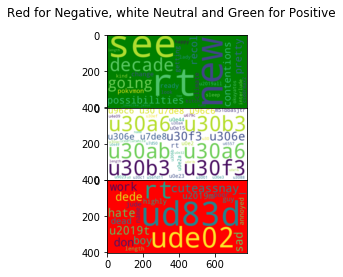

In [13]:
# Display the generated seperated image:
fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.suptitle('Red for Negative, white Neutral and Green for Positive')
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[2].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].imshow(neutral_wordcloud, interpolation='bilinear')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
plt.show()